In [30]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import glob
import re
from matplotlib import colors
import json

#for event display
import sys
#path to event display directory - change with where your path is 
sys.path.append("/eos/user/v/vgousyle/")
from WCTE_event_display.EventDisplay import EventDisplay
import matplotlib.colors as colors

In [33]:
run_number=1567
type_run='high'
#1478, 1848
file_path = "/eos/experiment/wcte/data/2025_commissioning/processed_offline_data/production_v0_5/"+str(run_number)+"/WCTE_offline_R"+str(run_number)+"S0_VME_matched.root"
with uproot.open(file_path) as root_file:
    tree = root_file["WCTEReadoutWindows"]
    branches_to_load = ["window_time"]
    all_events = tree.arrays(entry_start=0,entry_stop=1000,library="ak")    
    
    # to load specific branches only e.g.
    # branches_to_load = ["window_time"]
    #all_events = tree.arrays(entry_start=0,entry_stop=10000,filter_name=branches_to_load,library="ak")

In [34]:

file_path="/eos/user/v/vgousyle/proton_search/analysis_tools/notebooks/beam_analysis_output_pid_"+type_run+"_R"+str(run_number)+".root"
#file_path = "/eos/user/v/vgousyle/proton_search/analysis_tools/notebooks/beam_analysis_output_tof_R1566.root"
with uproot.open(file_path) as root_file:
    tree_beam=root_file["pid_"+type_run+"_analysis"]
    #tree = root_file["tof_analysis"]
    #tree_2 = root_file["run_info"]
    #branches_to_load = ["window_time"]
    all_events_beam = tree_beam.arrays(entry_start=0,entry_stop=1000,library="ak")    
    #run_info = tree_2.arrays(entry_start=0,entry_stop=10000,library="ak")  
    # to load specific branches only e.g.
    # branches_to_load = ["window_time"]
    # all_events = tree.arrays(entry_start=0,entry_stop=10000,filter_name=branches_to_load,library="ak")


In [35]:
print(all_events[0].fields)

['window_time', 'start_counter', 'run_id', 'sub_run_id', 'spill_counter', 'event_number', 'readout_number', 'trigger_types', 'trigger_times', 'led_gains', 'led_dacsettings', 'led_ids', 'led_card_ids', 'led_slot_numbers', 'led_event_types', 'led_types', 'led_sequence_numbers', 'led_counters', 'hit_mpmt_card_ids', 'hit_pmt_channel_ids', 'hit_mpmt_slot_ids', 'hit_pmt_position_ids', 'hit_pmt_charges', 'hit_pmt_times', 'pmt_waveform_mpmt_card_ids', 'pmt_waveform_pmt_channel_ids', 'pmt_waveform_mpmt_slot_ids', 'pmt_waveform_pmt_position_ids', 'pmt_waveform_times', 'pmt_waveforms', 'beamline_pmt_qdc_charges', 'beamline_pmt_tdc_times', 'beamline_pmt_qdc_ids', 'beamline_pmt_tdc_ids', 'window_data_quality', 'hit_pmt_calibrated_times', 'hit_pmt_readout_mask']


In [36]:
file_path = "/eos/experiment/wcte/data/2025_commissioning/processed_offline_data/production_v0_5/"+str(run_number)+"/run_"+str(run_number)+"_meta_data_json.json"

with open(file_path, "r") as f:
    metadata = json.load(f)
print(metadata.keys())

good_mpmt_channel_list = metadata["good_wcte_pmts"]
print(len(good_mpmt_channel_list),"wcte PMTs stably readout during the run")

print("The run configuration is",metadata["run_configuration"] )

dict_keys(['run_number', 'run_configuration', 'good_wcte_pmts', 'wcte_pmts_with_timing_constant', 'wcte_pmts_slow_control_stable', 'timing_constant_revision_id', 'timing_constant_insert_time'])
1562 wcte PMTs stably readout during the run
The run configuration is Good_mpmt_beam_v43


In [37]:
run_configuration_name = metadata["run_configuration"] 
config_file_path = "/eos/experiment/wcte/configuration/tooldaq_run_configs/configurations.json"
#More configuration 
#More configuration file ? Potentially 
with open(config_file_path, 'r') as f:
    config_data = json.load(f)
run_config = config_data[run_configuration_name]

print(run_config['device_configs'].keys())

#e.g to get the window times
print("Window pre-trigger (in CC)",run_config['device_configs']['WCTE_RBU']['WindowBuilder']['main_pre_trigger'])
print("Window post-trigger (in CC)",run_config['device_configs']['WCTE_RBU']['WindowBuilder']['main_post_trigger'])

dict_keys(['MPMT1', 'MPMT3', 'MPMT6', 'MPMT7', 'MPMT8', 'MPMT10', 'MPMT11', 'MPMT12', 'MPMT14', 'MPMT15', 'MPMT16', 'MPMT17', 'MPMT18', 'MPMT19', 'MPMT20', 'MPMT21', 'MPMT22', 'MPMT23', 'MPMT24', 'MPMT25', 'MPMT26', 'MPMT27', 'MPMT28', 'MPMT29', 'MPMT30', 'MPMT31', 'MPMT32', 'MPMT33', 'MPMT34', 'MPMT35', 'MPMT36', 'MPMT38', 'MPMT40', 'MPMT41', 'MPMT42', 'MPMT43', 'MPMT44', 'MPMT45', 'MPMT46', 'MPMT47', 'MPMT48', 'MPMT52', 'MPMT71', 'MPMT73', 'MPMT74', 'MPMT75', 'MPMT76', 'MPMT77', 'MPMT78', 'MPMT79', 'MPMT80', 'MPMT82', 'MPMT83', 'MPMT84', 'MPMT85', 'MPMT86', 'MPMT87', 'MPMT89', 'MPMT91', 'MPMT92', 'MPMT93', 'MPMT94', 'MPMT96', 'MPMT97', 'MPMT98', 'MPMT99', 'MPMT100', 'MPMT101', 'MPMT102', 'MPMT103', 'MPMT104', 'MPMT105', 'MPMT106', 'MPMT107', 'MPMT108', 'MPMT109', 'MPMT111', 'MPMT112', 'MPMT113', 'MPMT114', 'MPMT115', 'MPMT117', 'MPMT118', 'MPMT130', 'MPMT131', 'MPMT132', 'WCTE_RBU'])
Window pre-trigger (in CC) 300
Window post-trigger (in CC) 400


In [38]:
## Verify in the data that the window size of the event is correct
trigger_times = []
hit_times = [] 

for event in all_events:
    #the trigger time of the main trigger  
    trigger_times.append(event['trigger_times'][event['trigger_types']==3][0])

    hit_times.extend(event['hit_pmt_times'])

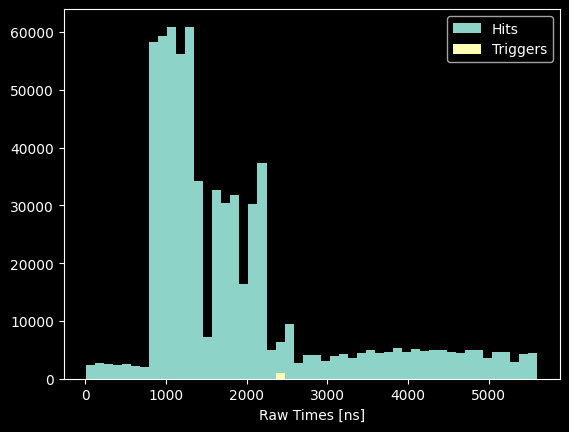

In [39]:
_, bins,_ = plt.hist(hit_times,bins =50, label = "Hits")
plt.hist(trigger_times, bins =bins, label = "Triggers")
plt.xlabel("Raw Times [ns]")
plt.legend()

In [40]:
#Calibrated hits 
hit_pmt_calibrated_times = ak.flatten(all_events["hit_pmt_calibrated_times"])
hit_pmt_muon=[]
for i in range(0,len(all_events)):
    if all_events_beam["is_muon"][i]==1:
        hit_pmt_muon.append(all_events["hit_pmt_calibrated_times"][i])
    else:
        continue



plt.hist(hit_pmt_calibrated_times, bins =100)
plt.xlabel("Calibrated Times [ns]")
plt.show

plt.figure()
plt.hist(hit_pmt_calibrated_times, bins =np.linspace(2160,2200,200))
plt.xlabel("Calibrated Times [ns]")


FieldNotFoundError: no field 'is_muon' in record with 3 fields

In [ ]:
all_events_beam["is_muon"][7]
bins[first_time][0]-50

NameError: name 'first_time' is not defined

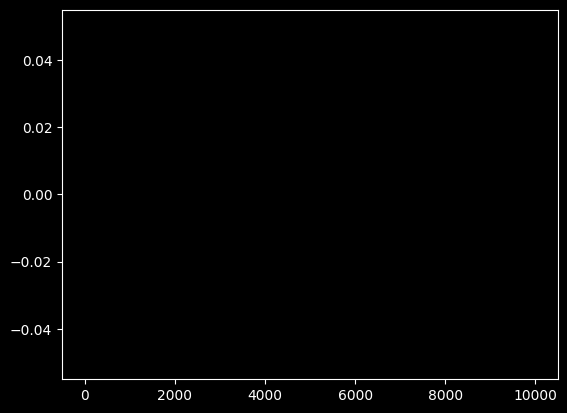

1711.171117111711


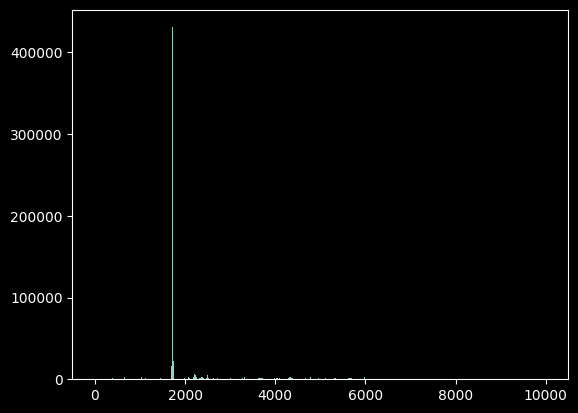

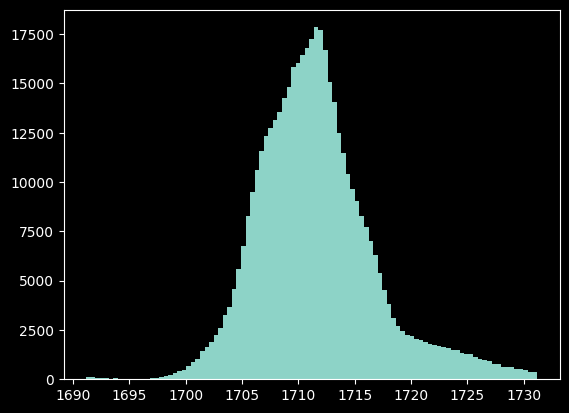

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  2.,  3.,  5.,  4.,  3.,  1., 10.,  7., 19., 16.,
         8.,  5.,  8.,  7.,  3.,  1.,  1.,  0.,  3.,  0.,  0.,  1.,  0.,
         1.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([1691.17111711, 1691.57515752, 1691.97919792, 1692.38323832,
        1692.78727873, 1693.19131913, 1693.59535954, 1693.99939994,
        1694.40344034, 1694.80748075, 1695.21152115, 1695.61556156,
        1696.01960196, 1696.42364236, 1696.82768277, 1697.23172317,
        1697.63576358, 1698.03980398, 1698.44384438, 1698.84788479,
        1699.25192519, 1699.6559656 , 1700.060006  , 1700.4640464 ,
        1700.86808681, 1701.272

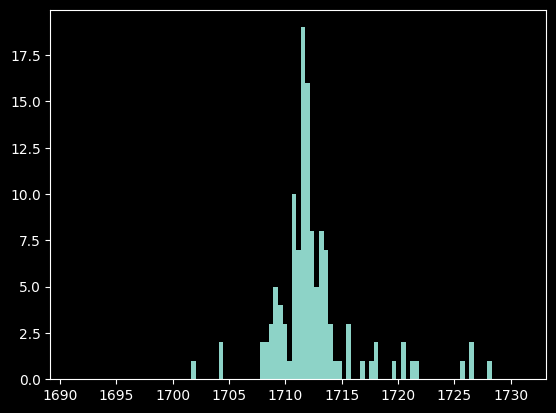

In [41]:
plt.hist(ak.flatten(hit_pmt_muon), bins =np.linspace(0,10000,200))
plt.show()
counts,bins=np.histogram(hit_pmt_calibrated_times,bins =np.linspace(0,10000,10000))
first_time=np.where(counts==np.max(counts))[0][0]
print(bins[first_time])
avg_time=bins[first_time]
plt.hist(hit_pmt_calibrated_times, bins =np.linspace(0,10000,500))
plt.show()
plt.hist(hit_pmt_calibrated_times,bins=np.linspace(bins[first_time]-20,bins[first_time]+20,100))
plt.show()
plt.hist(all_events["hit_pmt_calibrated_times"][7],bins=np.linspace(bins[first_time]-20,bins[first_time]+20,100))

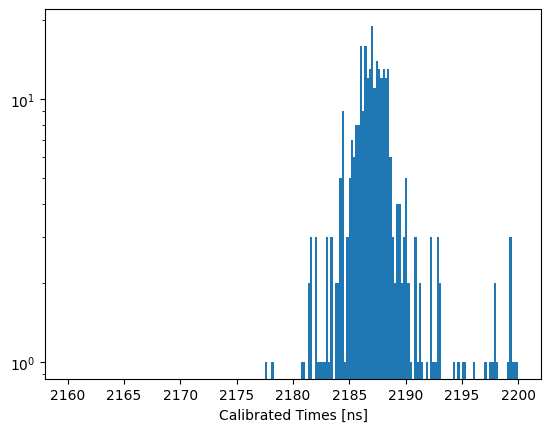

In [ ]:
 
plt.hist(all_events["hit_pmt_calibrated_times"][7], bins =np.linspace(2160,2200,200))
plt.xlabel("Calibrated Times [ns]")
plt.yscale("log")

In [ ]:
all_events_beam["is_muon"][0:10]

<Array [True, False, False, False, ..., True, False, False] type='10 * bool'>

In [ ]:
data_quality = [] 
window_times = [] 
for event in all_events:
    data_quality.append(event["window_data_quality"])
    window_times.append(event["window_time"])

window_times = np.array(window_times)
def find_hit_time(hit_time,):
    counts,bins=np.histogram(hit_time,bins =np.linspace(0,10000,200))
    first_time=np.where(counts==np.max(counts))
    return np.array(arrival_times)

Text(0, 0.5, 'Window time % 2^26 ns')

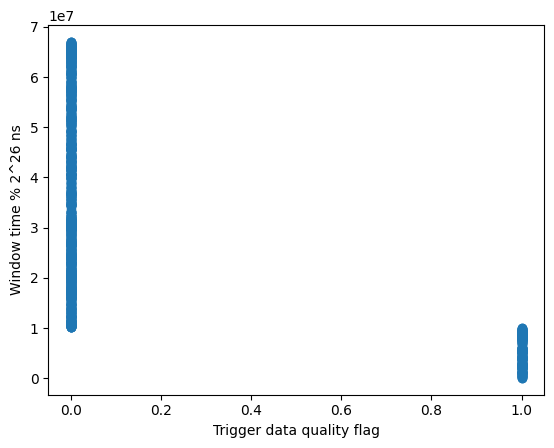

In [ ]:
plt.scatter(data_quality,window_times%(2**26))
plt.xlabel("Trigger data quality flag")
plt.ylabel("Window time % 2^26 ns")

In [ ]:
#e.g. look at the first 20 events and look at the number of hits which pass selection cuts
for ievent, event in enumerate(all_events[:2]):
    if (event['window_data_quality']!=0):
        print("Event excluded with flag",event['window_data_quality'])
        continue
    print(ievent)
    nhits = len(event['hit_pmt_times'])
    trigger_mainboard_hits = np.sum(event['hit_mpmt_card_ids']>120) # for trigger mainboards 130,131,132
    wcte_pmt_hits = np.sum((event['hit_mpmt_card_ids']<120))
    wcte_pmt_hits_pass_mask = np.sum((event['hit_mpmt_card_ids']<120) & (event['hit_pmt_readout_mask']==0))
    
    print("trigger_mainboard_hits",trigger_mainboard_hits,"wcte_pmt_hits",wcte_pmt_hits,"wcte_pmt_hits pass channel selection",wcte_pmt_hits_pass_mask)

0
trigger_mainboard_hits 28 wcte_pmt_hits 956 wcte_pmt_hits pass channel selection 956
1
trigger_mainboard_hits 35 wcte_pmt_hits 903 wcte_pmt_hits pass channel selection 903


In [ ]:
charge=len(all_events[0]['hit_pmt_charges'])
nhits = len(all_events[0]['hit_pmt_times'])
trigger_mainboard_hits =  np.sum((all_events[0]['hit_mpmt_card_ids']<120))
print(nhits,charge,trigger_mainboard_hits)
print(np.where(all_events_beam["is_muon"]==True))

984 984 956
(<Array [5, 15, 17, 27, 59, 92, ..., 664, 770, 774, 857, 995] type='32 * int64'>,)


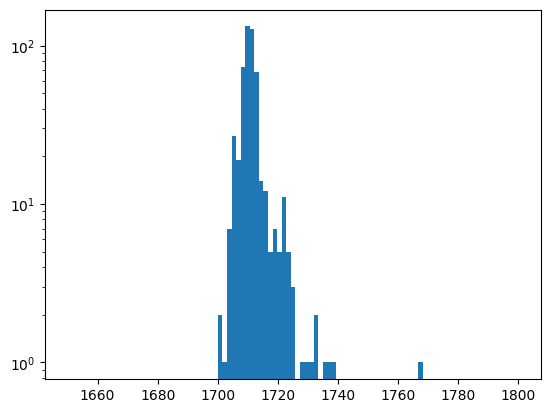

In [ ]:
plt.hist(all_events[5]['hit_pmt_calibrated_times'],bins=np.linspace(1650,1800,100))
plt.yscale("log")

In [43]:
import importlib
import WCTE_event_display.EventDisplay
from matplotlib.backends.backend_pdf import PdfPages

importlib.reload(WCTE_event_display.EventDisplay)

from WCTE_event_display.EventDisplay import EventDisplay

#create an instance of event diplay class
eventDisplay = EventDisplay() 
#load the positions of the mPMTs (an internal file to the event display class that 
#specificies where to plot and what orientation to plot mPMTs on the event display)
eventDisplay.load_mPMT_positions('mPMT_2D_projection_angles.csv')
pdf_global = PdfPages(f"/eos/user/v/vgousyle/proton_search/analysis_tools/notebooks/plots/proton_ring.pdf")
#e.g. select a single event randomly
for i in range(100,200):
    #print(all_events_beam["is_muon"][i])
    if all_events_beam["is_proton"][i]:
        event = all_events[i]
       
        if event['window_data_quality']!=0:
            print("Event excluded with flag",event['window_data_quality'])
            continue
        print("Data quality flag",event['window_data_quality'])
        #plt.hist(all_events["hit_pmt_calibrated_times"][i], bins =np.linspace(0,10000,500))
        #plt.show()
        counts,bins=np.histogram(all_events["hit_pmt_calibrated_times"][i],bins =np.linspace(avg_time-50,avg_time+50,500))
        first_time=np.where(counts==np.max(counts))[0][0]

        #apply a mask to hits, don't include hits labelled as bad or hits on trigger mainboards in the event display 1650,1800
        plt.hist(all_events["hit_pmt_calibrated_times"][i],bins=np.linspace(bins[first_time]-10,bins[first_time]+10,200))
        #plt.show()
        hit_mask = (event['hit_pmt_readout_mask']==0) & (event['hit_mpmt_card_ids']<120)&( event["hit_pmt_calibrated_times"]>bins[first_time]-10)&(event["hit_pmt_calibrated_times"]<bins[first_time]+10)
        if len(event['hit_pmt_charges'][hit_mask])<50: #Cut based on number of triggered PMTs
            continue
        pmt_slot = event['hit_mpmt_slot_ids'][hit_mask]
        pmt_pos = event['hit_pmt_position_ids'][hit_mask]
      
        data_to_plot  = event['hit_pmt_charges'][hit_mask]

        #this function processes pmt positions and the data to plot into an array for use by the event display
        #sum_data will sum data for the same channel e.g. if a channel has 2 hits in event['hit_pmt_charges'] they will be summed
        #if summed data is false it will by default take the smallest value for each channel for plotting time distributions
        ev_disp_data = eventDisplay.process_data(pmt_slot,pmt_pos,data_to_plot,sum_data=True)

        #this pltos the event display, colors.Normalize() will plot on a linear scale
        eventDisplay.plotEventDisplay(ev_disp_data,color_norm=colors.LogNorm(), style= "dark_background")

        #optional ability to draw the mPMT slot id for each mPMT
        # eventDisplay.label_mPMTs(np.arange(0,106))
        fig = plt.gcf()  
        pdf_global.savefig(fig)
        plt.close() 

        #plt.show(block=False)
        #plt.style.use('default') 
        #plt.hist(all_events[i]['hit_pmt_calibrated_times'][hit_mask],bins=np.linspace(428,440,100))
        #plt.yscale("log")   
        #plt.show()
    plt.close() 
pdf_global.close()


Data quality flag 0
(2014,)


Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0
(2014,)
Data quality flag 0


Data quality flag 0
(2014,)


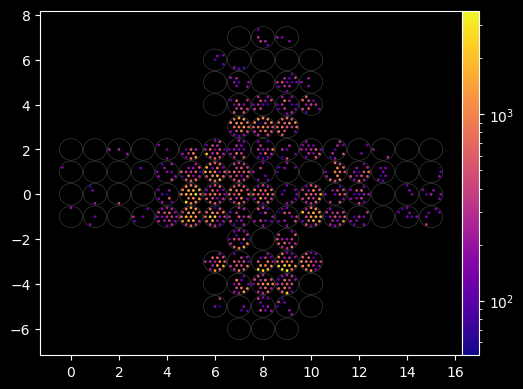

In [ ]:
event = all_events[110]
print("Data quality flag",event['window_data_quality'])

#apply a mask to hits, don't include hits labelled as bad or hits on trigger mainboards in the event display
hit_mask = (event['hit_pmt_readout_mask']==0) & (event['hit_mpmt_card_ids']<120) #&( event["hit_pmt_calibrated_times"]>1650)&(event["hit_pmt_calibrated_times"]<1800)

pmt_slot = event['hit_mpmt_slot_ids'][hit_mask]
pmt_pos = event['hit_pmt_position_ids'][hit_mask]
data_to_plot  = event['hit_pmt_charges'][hit_mask]

ev_disp_data = eventDisplay.process_data(pmt_slot,pmt_pos,data_to_plot,sum_data=True)
eventDisplay.plotEventDisplay(ev_disp_data,color_norm=colors.LogNorm(), style= "dark_background")
plt.show(block=False)
plt.style.use('default') 

In [ ]:
len(event['hit_pmt_charges'])

1005

In [ ]:
   event = all_events[0]

In [ ]:
len(event['hit_pmt_times'])

1005